# The Spark Foundation #GRIPJUNE 2021

## Task-2 ## Prediction using unsupervised ML

## Name: Syed Alauddin Bukhari 

In [51]:
!pip install jovian --upgrade --quiet
!pip install -U scikit-learn --quiet

In [52]:
import jovian
import pandas as pd 
import numpy as np


In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="k-means-algorithm",files=["Iris.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Data Preparing 

Loading  data into variable 

In [54]:
data_df=pd.read_csv("Iris.csv")

In [55]:
type(data_df)

pandas.core.frame.DataFrame

In [56]:
data_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [57]:
data_df.shape #Checking shape of dataframe

(150, 6)

In [58]:
data_df.drop(labels="Id",inplace=True,axis=1)

In [59]:
data_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Elbow method

But how many clusters can we divide the datapoints in? 
we can find that using elbow method,On it's basis we determine K value.

In [61]:
#Finding optimul numbers of KMean Classification

x = data_df.iloc[:, [0, 1, 2, 3]].values 


In [62]:
from sklearn.cluster import KMeans
wcss=[]#Empty List


for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    


## Plotting the Elbow Method

In [63]:
import matplotlib.pyplot as plt


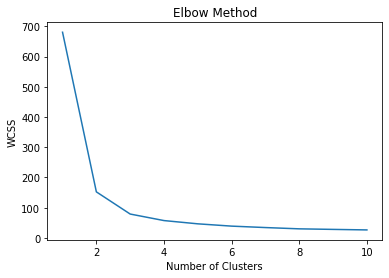

In [64]:
#ploting on line graph
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Why it is called 'The elbow method'?,from the above graph,we can observe that  the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration

Now we know exact K value or Optimuml clusters,It's time to predict

In [65]:
k=KMeans(n_clusters=3)
y_means=k.fit_predict(x)

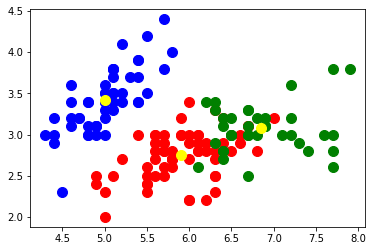

In [66]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k.cluster_centers_[:, 0], k.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')